In [1]:
#predict gender based on fav color, music genre, beverage, and softdrinks

### GENDER CLASSIFICATION 
The goal of this activity is to predict the gender based on color, music genre, beverage, and softdrinks, In this activity I will Identify the best model to use in this prediction

* 1. Data Exploration

In [2]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv('gender.csv');

In [4]:
df.head(5)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
#To check if the data is imbalance

df['Gender'].value_counts()

M    33
F    33
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


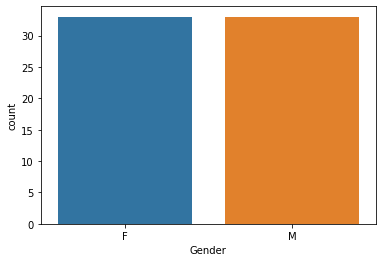

In [6]:
sns.countplot(df['Gender']);

* 2. Data Processing
* 2.1 Data Cleaning 
* 2.1.1 Drop Duplicates

In [7]:
#check the shape of the dataframe 
df.shape

(66, 5)

In [8]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [9]:
#check again the shape of the dataframe 
df.duplicated().sum()

0

* 2.1.2 Fill-in Missing Values

In [10]:
#Check if there are missing values
df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

### As we can see, our dataset has no missing value. We can proceed in to next procedure

* 2.1.3 Remove Extreme Values

In [11]:
#Checking the data types of features
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [12]:
#Changing data types into string
df = df.astype('string')
df.dtypes

Favorite Color          string
Favorite Music Genre    string
Favorite Beverage       string
Favorite Soft Drink     string
Gender                  string
dtype: object

### As we can see, we do not have any numerical value so we will proceed to next procedure.

* 2.1.4 Convert Categorical Features into Numerical Features

In [13]:
df.head(66)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
59,Cool,Pop,Whiskey,Other,M
60,Cool,Electronic,Whiskey,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [14]:
print(df['Favorite Color'].unique());

<StringArray>
['Cool', 'Neutral', 'Warm']
Length: 3, dtype: string


In [15]:
print(df['Favorite Music Genre'].unique());

<StringArray>
[            'Rock',          'Hip hop', 'Folk/Traditional',
       'Jazz/Blues',              'Pop',       'Electronic',
     'R&B and soul']
Length: 7, dtype: string


In [16]:
print(df['Favorite Beverage'].unique());

<StringArray>
['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other']
Length: 6, dtype: string


In [17]:
print(df['Favorite Soft Drink'].unique());

<StringArray>
['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other']
Length: 4, dtype: string


In [18]:
print(df['Gender'].unique());

<StringArray>
['F', 'M']
Length: 2, dtype: string


In [19]:
#import label encoder 
# I will use label encoder loop all columns to change it into numerical values
from sklearn.preprocessing import LabelEncoder

In [20]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [21]:
encoder = LabelEncoder();
df_new = df.copy();

In [22]:
#loop
for col in df_new.columns:
        if(col != 'Gender'):
            df_new[col] = encoder.fit_transform(df_new[col]);

In [23]:
df_new.head(5)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,F
1,1,2,3,1,F
2,2,6,5,1,F
3,2,1,4,2,F
4,0,6,3,1,F


In [24]:
df_new['Gender'] = np.where(df_new['Gender'] == 'F', 1,0)

In [25]:
df_new.head(65)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,1
1,1,2,3,1,1
2,2,6,5,1,1
3,2,1,4,2,1
4,0,6,3,1,1
...,...,...,...,...,...
59,0,4,4,3,0
60,0,0,4,1,0
63,1,2,1,2,0
64,0,6,5,1,0


In [26]:
df_new.dtypes

Favorite Color          int32
Favorite Music Genre    int32
Favorite Beverage       int32
Favorite Soft Drink     int32
Gender                  int32
dtype: object

* 2.2 Data Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
df_scaled = df_new.copy()
scaler = MinMaxScaler()

In [29]:
#loop

for col in df_scaled.columns:
    if(col != 'Gender'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));
        #convert into 2 dimensional array - values.reshape(-1,1)

In [30]:
df_scaled.head(5)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0.0,1.000000,0.6,0.000000,1
1,0.5,0.333333,0.6,0.333333,1
2,1.0,1.000000,1.0,0.333333,1
3,1.0,0.166667,0.8,0.666667,1
4,0.0,1.000000,0.6,0.333333,1


* 2.2.1 Feature Selection 

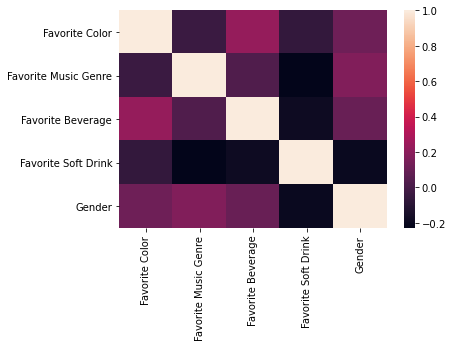

In [31]:
sns.heatmap(df_scaled.corr());

### 3. Data Modelling
* 3.1 Split Target variables to feature variables

In [32]:
#class is traget var
X = df_scaled.drop(['Gender'], axis=1);
y = df_scaled['Gender'];

* 3.2 Split the dataset to training and tests
* if supervised learning

In [33]:
#importing model selection for training and test
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50, train_size=.70, stratify=y);
#stratify - para same ang feature.

In [35]:
#see values of train and test
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(62, 4)
(43, 4)
(19, 4)


* 3.3 Choose The Best Model 
* 3.3.1 Naive Bayes

In [36]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [37]:
#for evaluation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report # so that we will not compute the accuracy

In [68]:
def evaluate_model(model):
    print('Classification Report\n',classification_report(y_test, model.predict(X_test), target_names=['F','M']));
    print('Confusion Matrix \n',confusion_matrix(y_test, model.predict(X_test), labels=[0,1]));
    print('\nTraining Accuracy Score: ', model.score(X_train, y_train))
    print('Test Accuracy Score: ', model.score(X_test, y_test))
    print('\n ROC Curve')
    plot_roc_curve(model,X_test,y_test);

In [69]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);
gnb.score(X_test, y_test)

0.5263157894736842

Classification Report
               precision    recall  f1-score   support

           F       0.57      0.40      0.47        10
           M       0.50      0.67      0.57         9

    accuracy                           0.53        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.54      0.53      0.52        19

Confusion Matrix 
 [[4 6]
 [3 6]]

Training Accuracy Score:  0.627906976744186
Test Accuracy Score:  0.5263157894736842

 ROC Curve


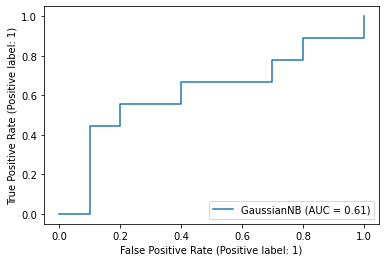

In [70]:
evaluate_model(gnb)

* 3.3.2 Bernoulli Naive Bayes

In [71]:
from sklearn.naive_bayes import BernoulliNB

In [72]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train);
bnb.score(X_test, y_test)

0.5789473684210527

Classification Report
               precision    recall  f1-score   support

           F       0.62      0.50      0.56        10
           M       0.55      0.67      0.60         9

    accuracy                           0.58        19
   macro avg       0.59      0.58      0.58        19
weighted avg       0.59      0.58      0.58        19

Confusion Matrix 
 [[5 5]
 [3 6]]

Training Accuracy Score:  0.627906976744186
Test Accuracy Score:  0.5789473684210527

 ROC Curve


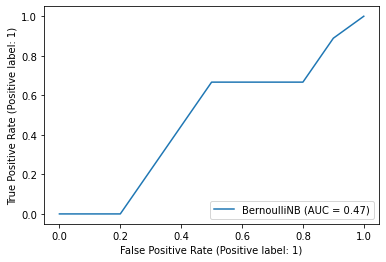

In [73]:
evaluate_model(bnb)

* 3.3.3 Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);
dt.score(X_test, y_test)

0.5789473684210527

Classification Report
               precision    recall  f1-score   support

           F       0.60      0.60      0.60        10
           M       0.56      0.56      0.56         9

    accuracy                           0.58        19
   macro avg       0.58      0.58      0.58        19
weighted avg       0.58      0.58      0.58        19

Confusion Matrix 
 [[6 4]
 [4 5]]

Training Accuracy Score:  0.9767441860465116
Test Accuracy Score:  0.5789473684210527

 ROC Curve


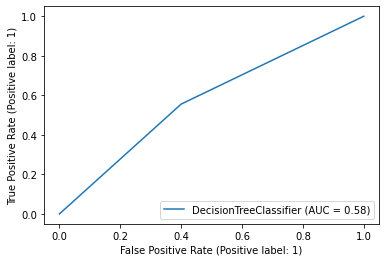

In [76]:
evaluate_model(dt)

* 3.3.4 Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train);
rf.score(X_test, y_test)

0.631578947368421

Classification Report
               precision    recall  f1-score   support

           F       0.67      0.60      0.63        10
           M       0.60      0.67      0.63         9

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19

Confusion Matrix 
 [[6 4]
 [3 6]]

Training Accuracy Score:  0.9767441860465116
Test Accuracy Score:  0.631578947368421

 ROC Curve


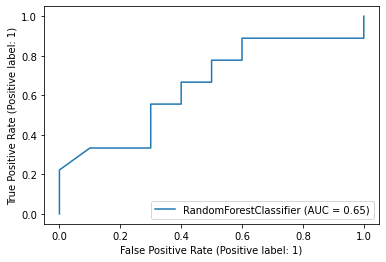

In [79]:
evaluate_model(rf)

* 3.3.5 KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);
knn.score(X_test, y_test)

0.6842105263157895

Classification Report
               precision    recall  f1-score   support

           F       0.83      0.50      0.62        10
           M       0.62      0.89      0.73         9

    accuracy                           0.68        19
   macro avg       0.72      0.69      0.68        19
weighted avg       0.73      0.68      0.67        19

Confusion Matrix 
 [[5 5]
 [1 8]]

Training Accuracy Score:  0.6976744186046512
Test Accuracy Score:  0.6842105263157895

 ROC Curve


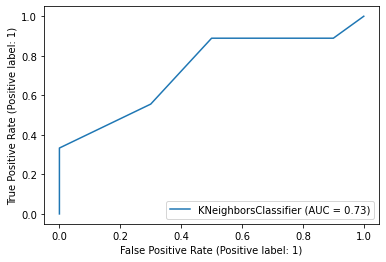

In [82]:
evaluate_model(knn)

* 3.3.5 Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
lr.score(X_test, y_test)

0.5789473684210527

Classification Report
               precision    recall  f1-score   support

           F       0.60      0.60      0.60        10
           M       0.56      0.56      0.56         9

    accuracy                           0.58        19
   macro avg       0.58      0.58      0.58        19
weighted avg       0.58      0.58      0.58        19

Confusion Matrix 
 [[6 4]
 [4 5]]

Training Accuracy Score:  0.6511627906976745
Test Accuracy Score:  0.5789473684210527

 ROC Curve


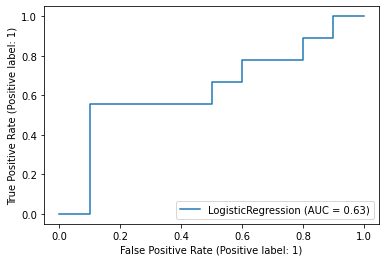

In [85]:
evaluate_model(lr)

### 4. Hyperparameter Tuning / Cross Validation
To tune our model into a better model


* 4.1.1 Decision Tree Classifier Hyperparameter Tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter = 15, cv = 10)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [88]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 20, 'criterion': 'gini'}

In [89]:
dt_tuned = DecisionTreeClassifier(
        splitter ='best',
        max_depth = 20, 
        criterion = 'entropy'
)

In [90]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

Classification Report
               precision    recall  f1-score   support

           F       0.60      0.60      0.60        10
           M       0.56      0.56      0.56         9

    accuracy                           0.58        19
   macro avg       0.58      0.58      0.58        19
weighted avg       0.58      0.58      0.58        19

Confusion Matrix 
 [[6 4]
 [4 5]]

Training Accuracy Score:  0.9767441860465116
Test Accuracy Score:  0.5789473684210527

 ROC Curve


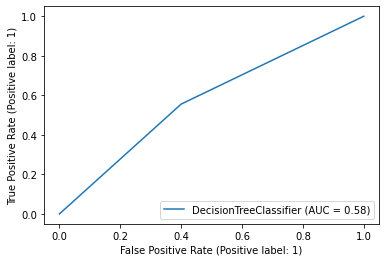

In [91]:
evaluate_model(dt_tuned)

## I will try using grid search to find the best parameter for decision tree model

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

gsearch = GridSearchCV(DecisionTreeClassifier(), params, cv = 15)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'splitter': ['best', 'random']})

In [64]:
gsearch.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [65]:
dt_tuned = DecisionTreeClassifier(
        splitter ='best',
        max_depth = 5, 
        criterion = 'entropy'
)

In [66]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Classification Report
               precision    recall  f1-score   support

      edible       0.55      0.60      0.57        10
   poisonous       0.50      0.44      0.47         9

    accuracy                           0.53        19
   macro avg       0.52      0.52      0.52        19
weighted avg       0.52      0.53      0.52        19

Confusion Matrix 
 [[6 4]
 [5 4]]

Training Accuracy Score:  0.9069767441860465
Test Accuracy Score:  0.5263157894736842

 ROC Curve


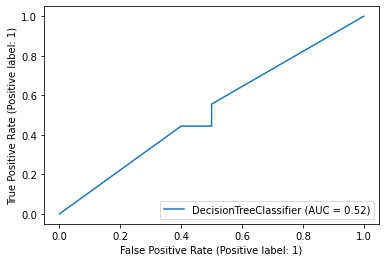

In [67]:
evaluate_model(dt_tuned)

* 4.1.2 KNeighbors Classifier Hyperparameter Tuning

In [92]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [105]:
params = {
    'n_jobs': [5,10,15,20],
    'leaf_size': [10,20,30,40,50],
    'p': [1,2,3,4,5,6,7,8,9]
}

rsearch = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter = 15, cv = 10)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=15,
                   param_distributions={'leaf_size': [10, 20, 30, 40, 50],
                                        'n_jobs': [5, 10, 15, 20],
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [106]:
rsearch.best_params_

{'p': 2, 'n_jobs': 5, 'leaf_size': 20}

In [107]:
knn_tuned = KNeighborsClassifier(
        n_jobs = 20,
        leaf_size = 10, 
        p = 2
)

In [108]:
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=20)

Classification Report
               precision    recall  f1-score   support

           F       0.83      0.50      0.62        10
           M       0.62      0.89      0.73         9

    accuracy                           0.68        19
   macro avg       0.72      0.69      0.68        19
weighted avg       0.73      0.68      0.67        19

Confusion Matrix 
 [[5 5]
 [1 8]]

Training Accuracy Score:  0.6976744186046512
Test Accuracy Score:  0.6842105263157895

 ROC Curve


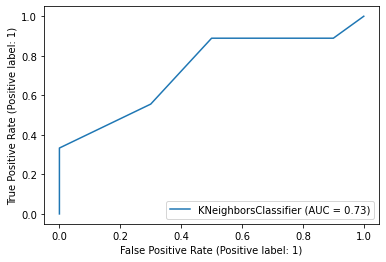

In [109]:
evaluate_model(knn_tuned)